In [10]:
# Creating a Neural Network

In [1]:
# Imports TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Dataset
We will use the MNIST Fashion Dataset. This is a dataset that is included in keras.
This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [2]:
# load dataset
fashion_mnist = keras.datasets.fashion_mnist

# split into testing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [4]:
#Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

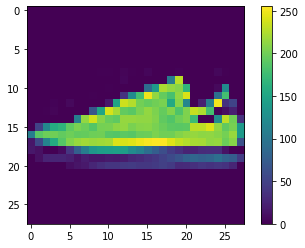

In [6]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
#Data Preprocessing
The last step before creating our model is to preprocess our data. 
This simply means applying some prior transformations to our data before feeding it the model. 
In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. 
We can do this by dividing each value in the training and testing sets by 255.0. 
We do this because smaller values will make it easier for the model to process our values.

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
#Building the Model
We are going to use a keras sequential model with three different layers. 
This model represents a feed-forward neural network (one that passes values from left to right).

Layer 1: This is our input layer and it will conist of 784 neurons. 
    We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. 
    The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

Layer 2: This is our first and only hidden layer. 
    The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. 
    It has 128 neurons and uses the rectify linear unit activation function.

Layer 3: This is our output later and is also a dense layer. 
    It has 10 neurons that we will look at to determine our models output. 
    Each neuron represnts the probabillity of a given image being one of the 10 different classes. 
    The activation function softmax is used on this layer to calculate a probabillity distribution for each class. 
    This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [10]:
#Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
#Training the Model
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 19s 7ms/step - loss: 0.4989 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3744 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3342 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3095 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2939 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2805 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2687 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2584 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2477 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [ ]:
#Evaluating the Model
We can do this quite easily using another builtin method from keras.
The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3467 - accuracy: 0.8820
Test accuracy: 0.8820000290870667


In [24]:
test_images.shape

(10000, 28, 28)

In [30]:
#Making Predictions
#To make predictions we simply need to pass an array of data in the form we ve specified in the input layer to .predict() method.
index = 0
predictions = model.predict(test_images[index])

1/1 [==============================] - 0s 46ms/step


In [33]:
predictions[index]

array([1.8592448e-08, 1.8976406e-08, 1.8656817e-08, 1.3862202e-10,
       1.9757803e-08, 6.3529960e-04, 1.4201017e-07, 9.7497717e-02,
       1.5962367e-07, 9.0186667e-01], dtype=float32)

In [34]:
np.argmax(predictions[index]) #If we wan't to get the value with the highest score we can use a useful function from numpy called argmax(). This simply returns the index of the maximium value from a numpy array.

9

In [35]:
test_labels[index]  #And we can check if this is correct by looking at the value of the cooresponding test label.

9

Pick a number: 9
1/1 [==============================] - 0s 31ms/step


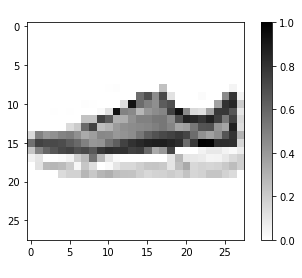

In [18]:
#Verifying Predictions
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)